<a href="https://colab.research.google.com/github/debashisdotchatterjee/Novel-Variant-of-Skewed-Von-Mises-Distribution-for-Asymmetric-Circular-Data/blob/main/Skewed_von_Mises_Distribution_(SVM)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy scipy matplotlib


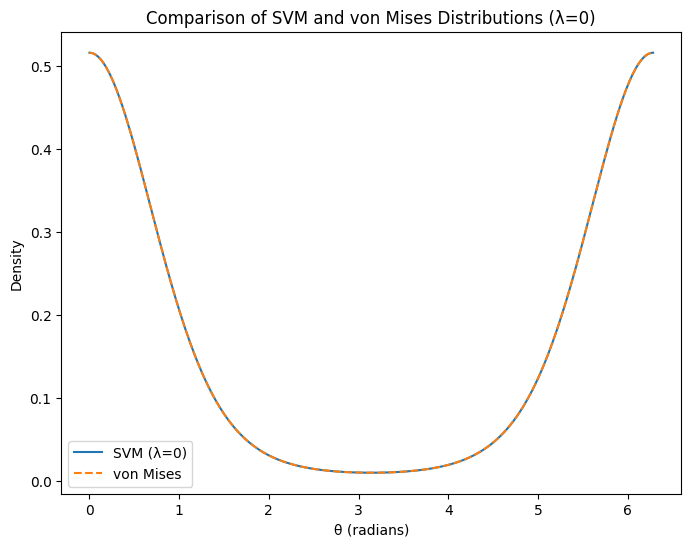

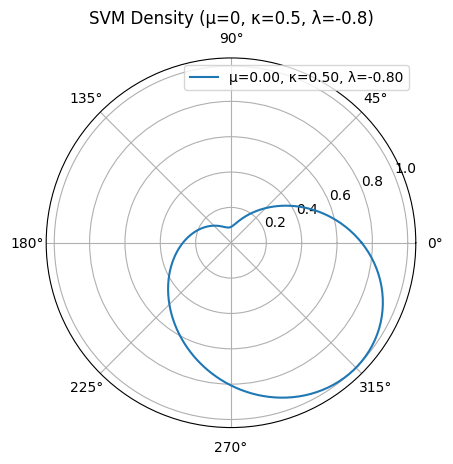

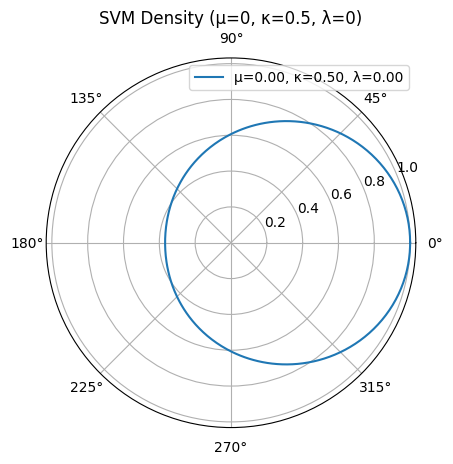

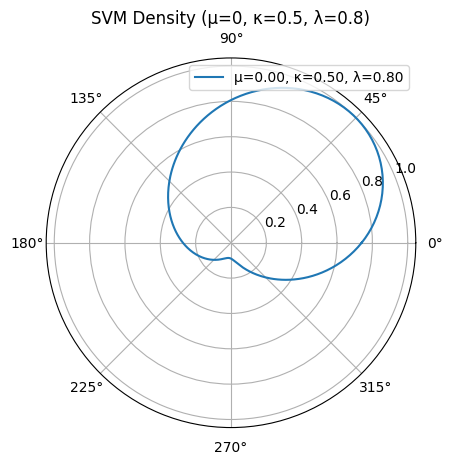

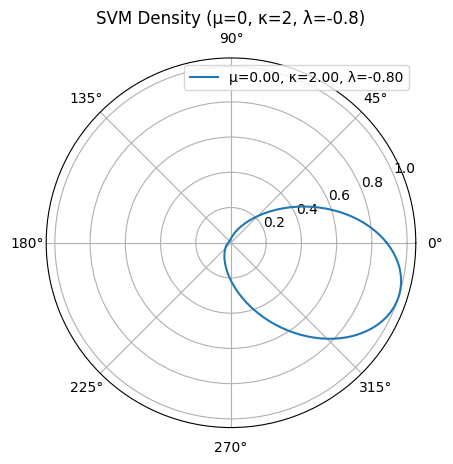

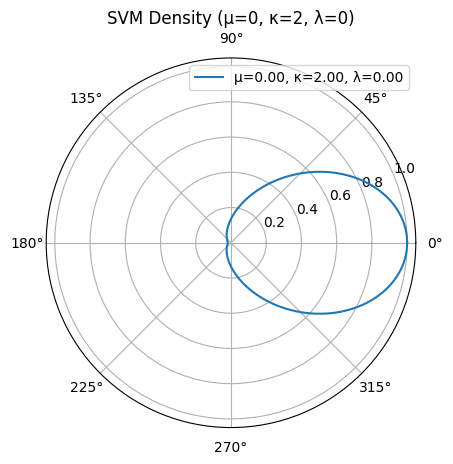

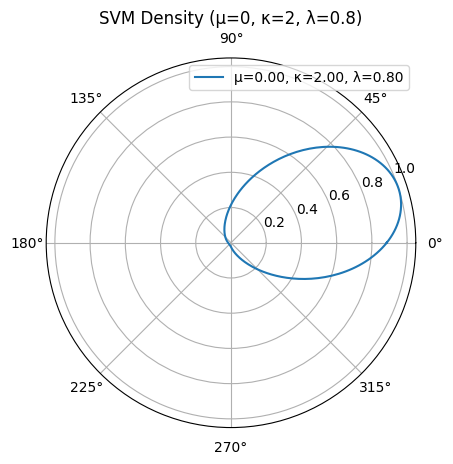

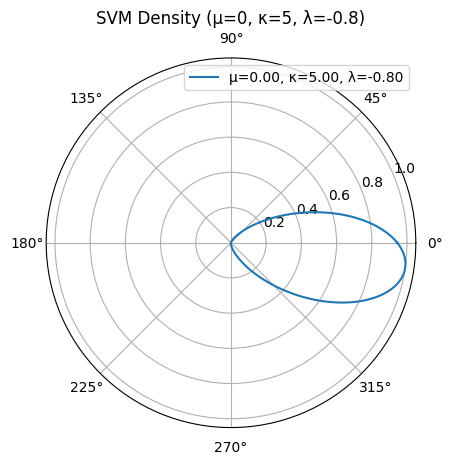

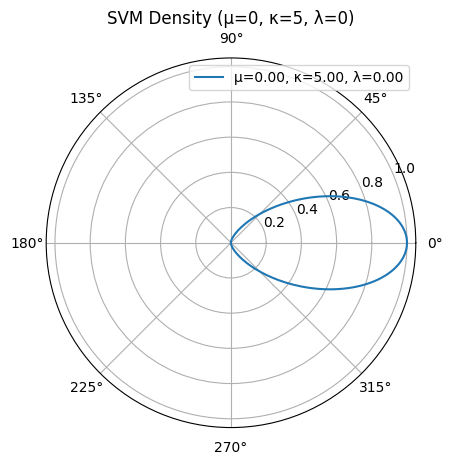

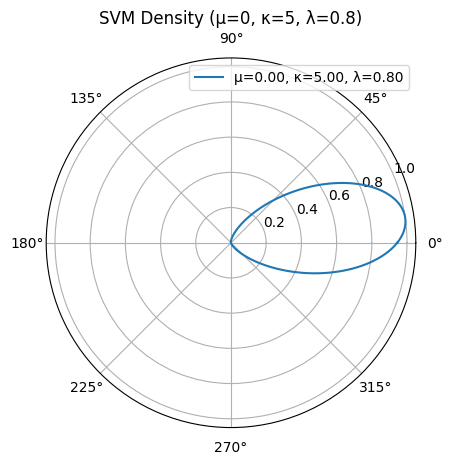

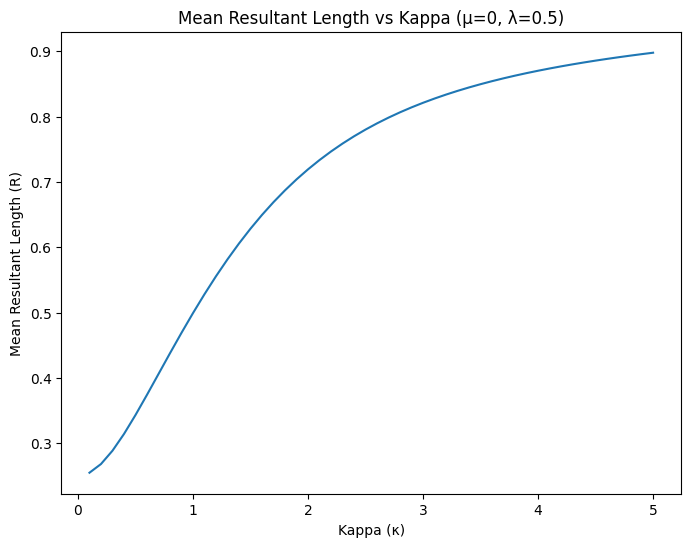

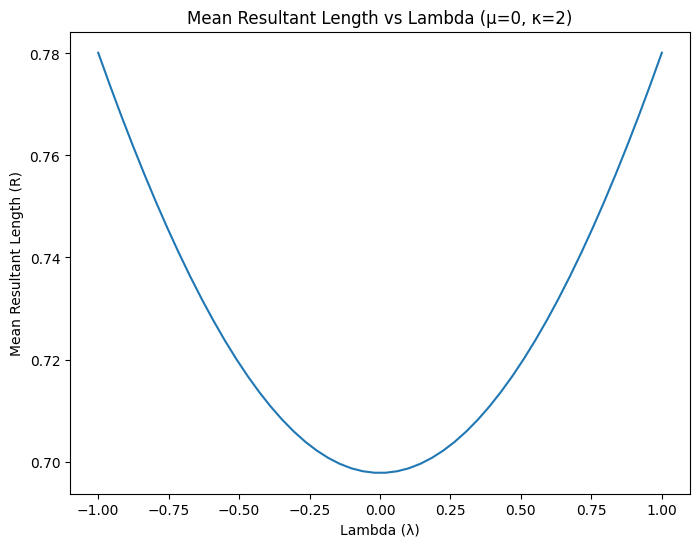

    μ    κ    λ     E[sin(θ)]  E[cos(θ)]  Mean Resultant Length (R)  \
0   0  0.5 -0.5 -2.424996e-01   0.242500                   0.342946   
1   0  0.5  0.0  3.184270e-17   0.242500                   0.242500   
2   0  0.5  0.5  2.424996e-01   0.242500                   0.342946   
3   0  1.0 -0.5 -2.231950e-01   0.446390                   0.499079   
4   0  1.0  0.0  2.833963e-17   0.446390                   0.446390   
5   0  1.0  0.5  2.231950e-01   0.446390                   0.499079   
6   0  2.0 -0.5 -1.744437e-01   0.697775                   0.719250   
7   0  2.0  0.0  3.928538e-17   0.697775                   0.697775   
8   0  2.0  0.5  1.744437e-01   0.697775                   0.719250   
9   0  5.0 -0.5 -8.933831e-02   0.893383                   0.897839   
10  0  5.0  0.0  1.154278e-17   0.893383                   0.893383   
11  0  5.0  0.5  8.933831e-02   0.893383                   0.897839   

    Circular Variance  
0            0.657054  
1            0.757500  
2   

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import os

# Create a directory to save plots and tables
output_dir = 'svm_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to compute the SVM probability density function
def svm_pdf(theta, mu, kappa, lam):
    """
    Compute the probability density function of the Skewed von Mises distribution.

    Parameters:
    - theta: array_like, angles in radians.
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter (kappa >= 0).
    - lam: float, skewness parameter (|lam| <= 1).

    Returns:
    - pdf: array_like, probability densities corresponding to theta.
    """
    C = 1 / (2 * np.pi * sp.i0(kappa))
    exponent = kappa * np.cos(theta - mu)
    skew_term = 1 + lam * np.sin(theta - mu)
    pdf = C * np.exp(exponent) * skew_term
    pdf = np.maximum(pdf, 0)  # Ensure non-negativity
    return pdf

# Function to simulate random variables from the SVM distribution using rejection sampling
def svm_rvs(mu, kappa, lam, size=1):
    """
    Generate random variates from the Skewed von Mises distribution.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter (kappa >= 0).
    - lam: float, skewness parameter (|lam| <= 1).
    - size: int, number of samples to generate.

    Returns:
    - samples: array_like, generated random angles in radians.
    """
    samples = []
    c = 1 / (2 * np.pi * sp.i0(kappa))  # Normalizing constant without skewness
    M = 1 + abs(lam)  # Upper bound for rejection sampling
    while len(samples) < size:
        # Proposal distribution: Uniform over [0, 2*pi)
        theta = np.random.uniform(0, 2 * np.pi)
        u = np.random.uniform(0, M * c * np.exp(kappa))
        f_theta = svm_pdf(theta, mu, kappa, lam)
        if u <= f_theta:
            samples.append(theta)
    return np.array(samples)

# Function to plot the SVM density around the circumference of a circle
def plot_svm_density_circular(mu, kappa, lam, title='', save_path=None):
    """
    Plot the SVM density function on the circumference of a circle.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lam: float, skewness parameter.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    pdf = svm_pdf(theta, mu, kappa, lam)

    # Normalize pdf for plotting
    pdf_normalized = pdf / pdf.max()

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(theta, pdf_normalized, label=f'μ={mu:.2f}, κ={kappa:.2f}, λ={lam:.2f}')
    ax.set_title(title)
    ax.legend(loc='upper right')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to compute moments of the SVM distribution
def compute_svm_moments(mu, kappa, lam):
    """
    Compute the first and second trigonometric moments of the SVM distribution.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lam: float, skewness parameter.

    Returns:
    - E_sin: float, expected value of sin(θ).
    - E_cos: float, expected value of cos(θ).
    - Var_theta: float, circular variance.
    """
    # Due to complexity, we use numerical integration
    from scipy.integrate import quad

    # Integrate over one period
    integrand_sin = lambda theta: np.sin(theta) * svm_pdf(theta, mu, kappa, lam)
    integrand_cos = lambda theta: np.cos(theta) * svm_pdf(theta, mu, kappa, lam)

    E_sin, _ = quad(integrand_sin, 0, 2 * np.pi)
    E_cos, _ = quad(integrand_cos, 0, 2 * np.pi)

    R = np.sqrt(E_sin**2 + E_cos**2)
    Var_theta = 1 - R

    return E_sin, E_cos, Var_theta

# Function to demonstrate that SVM reduces to von Mises when λ=0
def compare_svm_vm(mu, kappa):
    """
    Compare the SVM and von Mises distributions when λ=0.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    svm_pdf_vals = svm_pdf(theta, mu, kappa, lam=0)
    vm_pdf_vals = svm_pdf(theta, mu, kappa, lam=0)  # Since λ=0, SVM reduces to von Mises

    plt.figure(figsize=(8, 6))
    plt.plot(theta, svm_pdf_vals, label='SVM (λ=0)')
    plt.plot(theta, vm_pdf_vals, '--', label='von Mises')
    plt.title('Comparison of SVM and von Mises Distributions (λ=0)')
    plt.xlabel('θ (radians)')
    plt.ylabel('Density')
    plt.legend()
    save_path = os.path.join(output_dir, 'svm_vs_vm.png')
    plt.savefig(save_path)
    plt.show()

# Function to plot moments as functions of parameters
def plot_moments(mu_values, kappa_values, lam_values):
    """
    Plot the first trigonometric moment (mean resultant length) as functions of parameters.

    Parameters:
    - mu_values: array_like, range of mu values.
    - kappa_values: array_like, range of kappa values.
    - lam_values: array_like, range of lambda values.
    """
    # Fixed parameters
    mu_fixed = 0
    lam_fixed = 0.5
    kappa_fixed = 2

    # Vary kappa, keep mu and lambda fixed
    R_values_kappa = []
    for kappa in kappa_values:
        E_sin, E_cos, Var_theta = compute_svm_moments(mu_fixed, kappa, lam_fixed)
        R = np.sqrt(E_sin**2 + E_cos**2)
        R_values_kappa.append(R)

    plt.figure(figsize=(8, 6))
    plt.plot(kappa_values, R_values_kappa)
    plt.title('Mean Resultant Length vs Kappa (μ=0, λ=0.5)')
    plt.xlabel('Kappa (κ)')
    plt.ylabel('Mean Resultant Length (R)')
    save_path = os.path.join(output_dir, 'mean_resultant_length_vs_kappa.png')
    plt.savefig(save_path)
    plt.show()

    # Vary lambda, keep mu and kappa fixed
    R_values_lam = []
    for lam in lam_values:
        E_sin, E_cos, Var_theta = compute_svm_moments(mu_fixed, kappa_fixed, lam)
        R = np.sqrt(E_sin**2 + E_cos**2)
        R_values_lam.append(R)

    plt.figure(figsize=(8, 6))
    plt.plot(lam_values, R_values_lam)
    plt.title('Mean Resultant Length vs Lambda (μ=0, κ=2)')
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Mean Resultant Length (R)')
    save_path = os.path.join(output_dir, 'mean_resultant_length_vs_lambda.png')
    plt.savefig(save_path)
    plt.show()

# Additional plots: PDF with varying parameters
def plot_svm_density_various_params():
    """
    Generate plots of the SVM density function for various parameter values.
    """
    mu = 0
    kappa_values = [0.5, 2, 5]
    lam_values = [-0.8, 0, 0.8]

    for kappa in kappa_values:
        for lam in lam_values:
            title = f'SVM Density (μ=0, κ={kappa}, λ={lam})'
            save_path = os.path.join(output_dir, f'svm_density_mu0_kappa{kappa}_lam{lam}.png')
            plot_svm_density_circular(mu, kappa, lam, title=title, save_path=save_path)

# Function to generate a table of moments for different parameters
def generate_moments_table():
    """
    Generate a table of moments for different combinations of parameters.
    """
    mu_values = [0]
    kappa_values = [0.5, 1, 2, 5]
    lam_values = [-0.5, 0, 0.5]

    import pandas as pd

    data = []
    for mu in mu_values:
        for kappa in kappa_values:
            for lam in lam_values:
                E_sin, E_cos, Var_theta = compute_svm_moments(mu, kappa, lam)
                R = np.sqrt(E_sin**2 + E_cos**2)
                data.append({
                    'μ': mu,
                    'κ': kappa,
                    'λ': lam,
                    'E[sin(θ)]': E_sin,
                    'E[cos(θ)]': E_cos,
                    'Mean Resultant Length (R)': R,
                    'Circular Variance': Var_theta
                })

    df = pd.DataFrame(data)
    save_path = os.path.join(output_dir, 'svm_moments_table.csv')
    df.to_csv(save_path, index=False)
    print(df)

# Main execution function
def main():
    # Compare SVM and von Mises when λ=0
    compare_svm_vm(mu=0, kappa=2)

    # Plot SVM density with varying parameters
    plot_svm_density_various_params()

    # Plot moments as functions of parameters
    kappa_values = np.linspace(0.1, 5, 50)
    lam_values = np.linspace(-1, 1, 50)
    plot_moments(mu_values=[0], kappa_values=kappa_values, lam_values=lam_values)

    # Generate table of moments
    generate_moments_table()

if __name__ == "__main__":
    main()


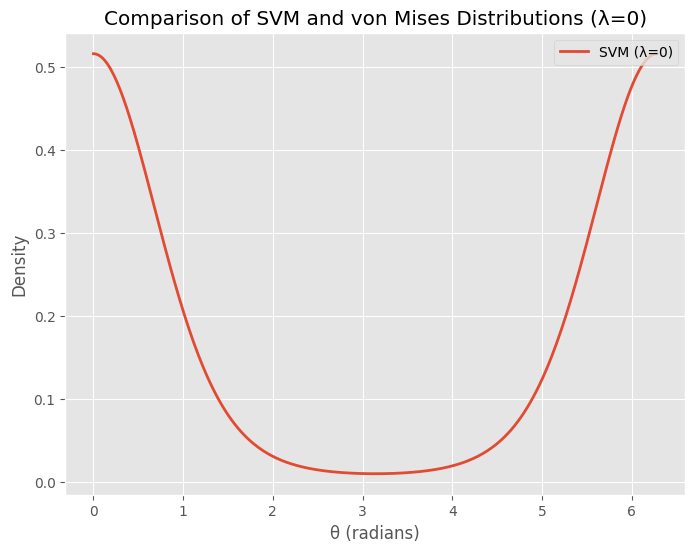

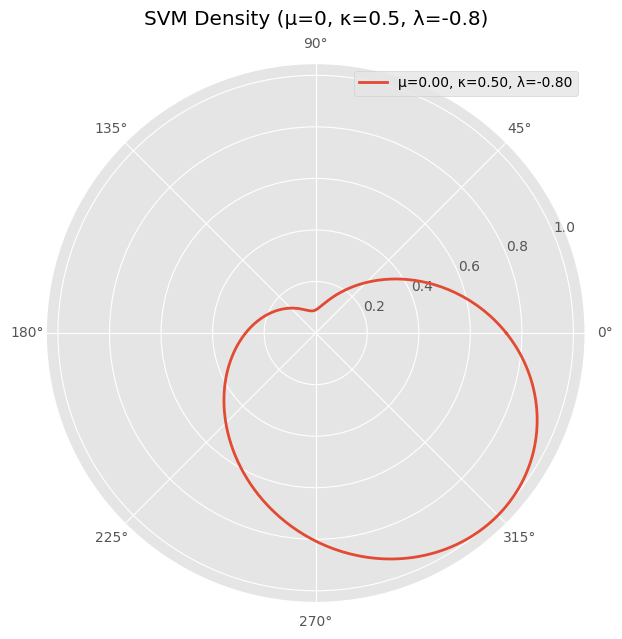

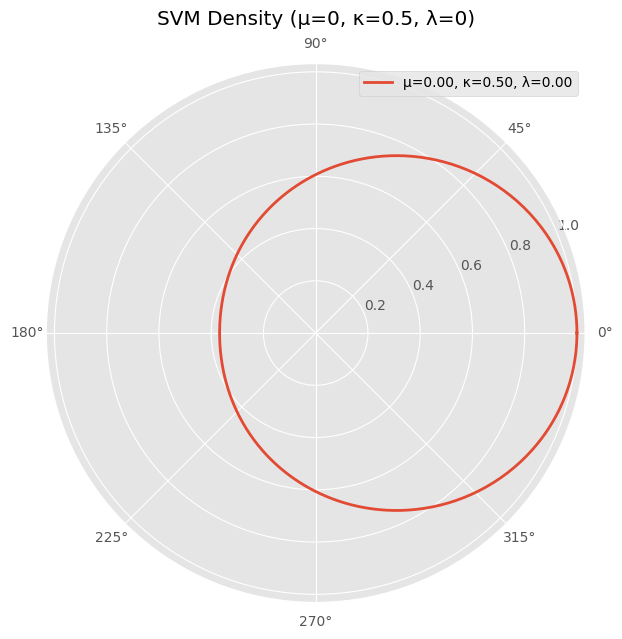

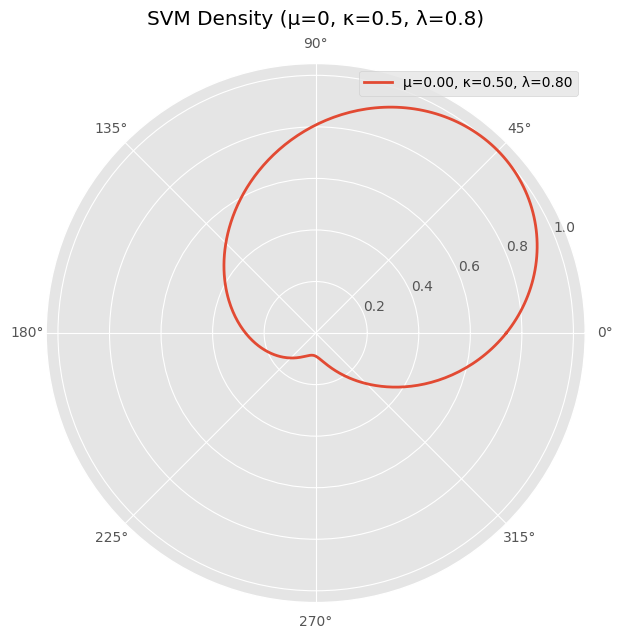

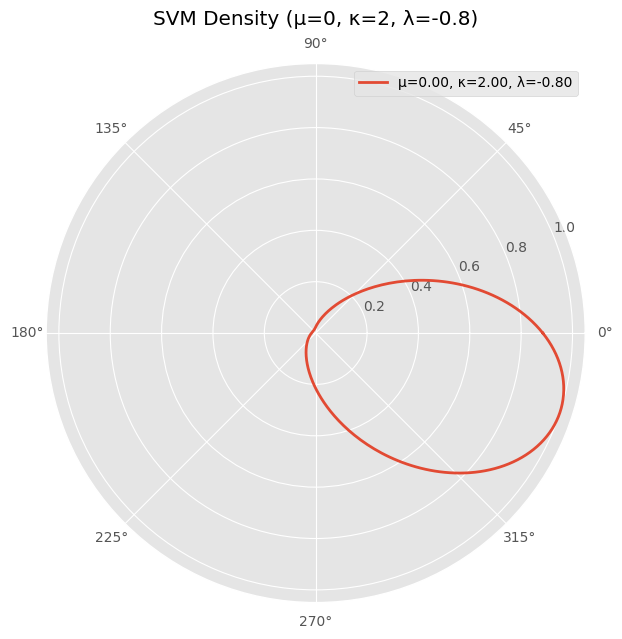

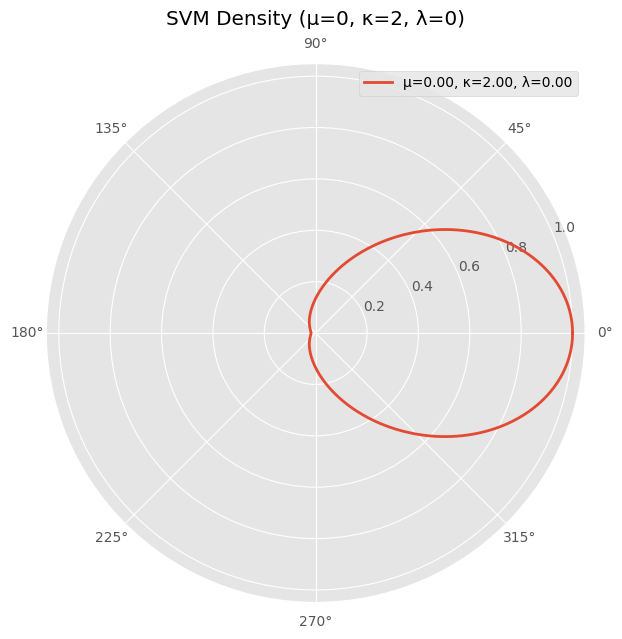

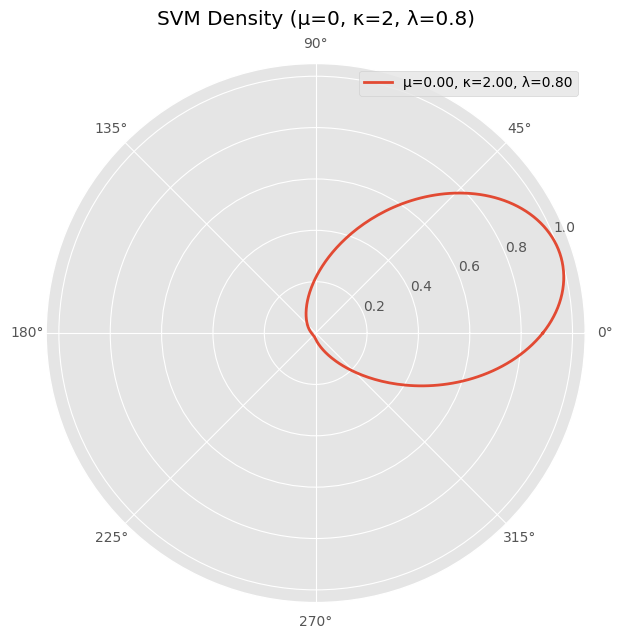

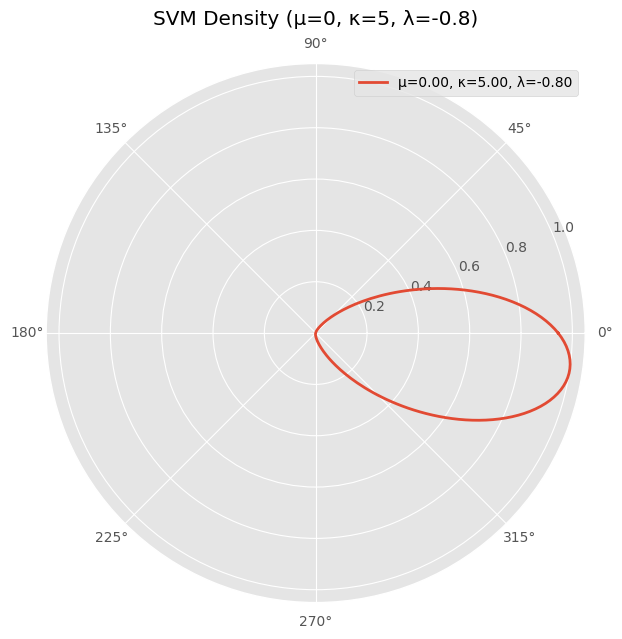

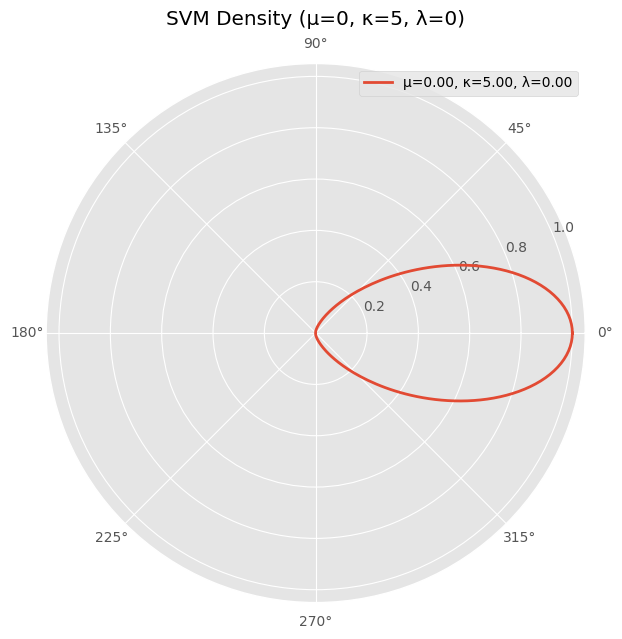

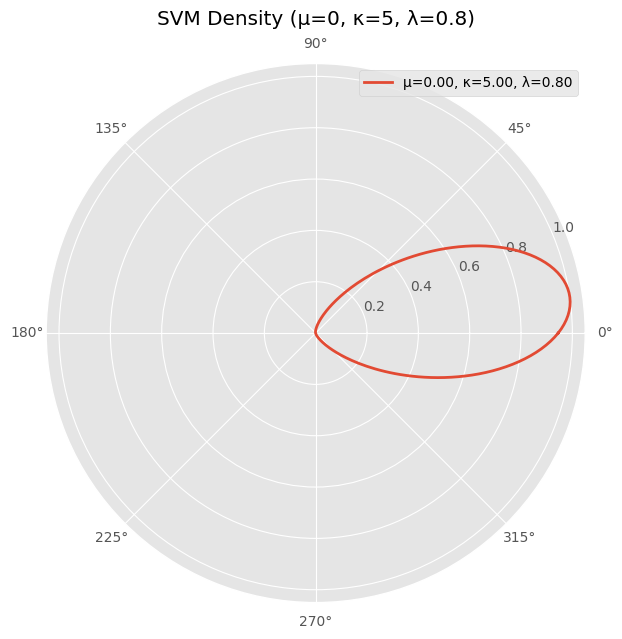

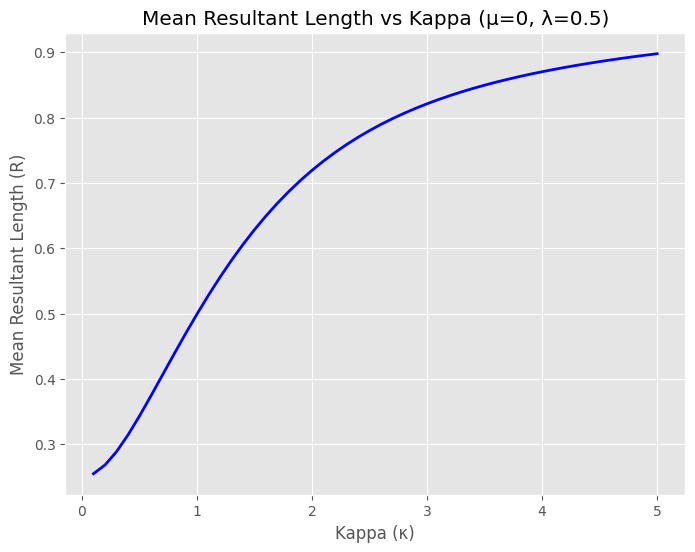

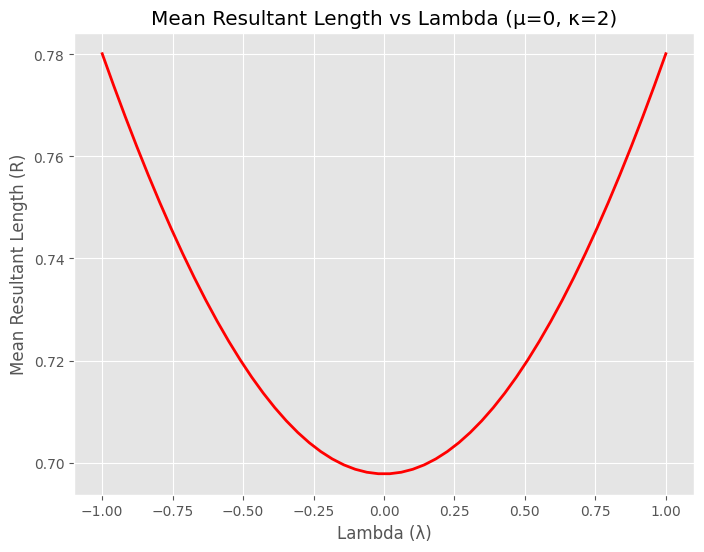

    μ    κ    λ     E[sin(θ)]  E[cos(θ)]  Mean Resultant Length (R)  \
0   0  0.5 -0.5 -2.424996e-01   0.242500                   0.342946   
1   0  0.5  0.0  3.184270e-17   0.242500                   0.242500   
2   0  0.5  0.5  2.424996e-01   0.242500                   0.342946   
3   0  1.0 -0.5 -2.231950e-01   0.446390                   0.499079   
4   0  1.0  0.0  2.833963e-17   0.446390                   0.446390   
5   0  1.0  0.5  2.231950e-01   0.446390                   0.499079   
6   0  2.0 -0.5 -1.744437e-01   0.697775                   0.719250   
7   0  2.0  0.0  3.928538e-17   0.697775                   0.697775   
8   0  2.0  0.5  1.744437e-01   0.697775                   0.719250   
9   0  5.0 -0.5 -8.933831e-02   0.893383                   0.897839   
10  0  5.0  0.0  1.154278e-17   0.893383                   0.893383   
11  0  5.0  0.5  8.933831e-02   0.893383                   0.897839   

    Circular Variance  
0            0.657054  
1            0.757500  
2   

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from scipy.optimize import brentq
import os

# Create a directory to save plots and tables if not exists
output_dir = 'svm_plots'
os.makedirs(output_dir, exist_ok=True)

# Skewed von Mises Distribution PDF
def svm_pdf(theta, mu, kappa, lam):
    """
    Compute the probability density function of the Skewed von Mises distribution.

    Parameters:
    - theta: array_like, angles in radians.
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter (kappa >= 0).
    - lam: float, skewness parameter (|lam| <= 1).

    Returns:
    - pdf: array_like, probability densities corresponding to theta.
    """
    C = 1 / (2 * np.pi * sp.i0(kappa))  # Normalizing constant
    exponent = kappa * np.cos(theta - mu)
    skew_term = 1 + lam * np.sin(theta - mu)
    pdf = C * np.exp(exponent) * skew_term
    return np.maximum(pdf, 0)  # Ensure non-negativity

# Simulate random variables from the SVM distribution using rejection sampling
def svm_rvs(mu, kappa, lam, size=1):
    """
    Generate random variates from the Skewed von Mises distribution.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter (kappa >= 0).
    - lam: float, skewness parameter (|lam| <= 1).
    - size: int, number of samples to generate.

    Returns:
    - samples: array_like, generated random angles in radians.
    """
    samples = []
    c = 1 / (2 * np.pi * sp.i0(kappa))
    M = 1 + abs(lam)  # Upper bound for rejection sampling

    while len(samples) < size:
        theta = np.random.uniform(0, 2 * np.pi)
        u = np.random.uniform(0, M * c * np.exp(kappa))
        f_theta = svm_pdf(theta, mu, kappa, lam)
        if u <= f_theta:
            samples.append(theta)

    return np.array(samples)

# Plot the SVM density function on the circumference of a circle
def plot_svm_density_circular(mu, kappa, lam, title='', save_path=None):
    """
    Plot the SVM density function on the circumference of a circle.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lam: float, skewness parameter.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    pdf = svm_pdf(theta, mu, kappa, lam)
    pdf_normalized = pdf / pdf.max()  # Normalize pdf for plotting

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(7, 7))
    ax.plot(theta, pdf_normalized, label=f'μ={mu:.2f}, κ={kappa:.2f}, λ={lam:.2f}', lw=2)
    ax.set_title(title, va='bottom')
    ax.legend(loc='upper right')

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Compute the first and second trigonometric moments of the SVM distribution
def compute_svm_moments(mu, kappa, lam):
    """
    Compute the first and second trigonometric moments of the SVM distribution.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lam: float, skewness parameter.

    Returns:
    - E_sin: float, expected value of sin(θ).
    - E_cos: float, expected value of cos(θ).
    - Var_theta: float, circular variance.
    """
    from scipy.integrate import quad

    # Define integrands for sin(θ) and cos(θ)
    integrand_sin = lambda theta: np.sin(theta) * svm_pdf(theta, mu, kappa, lam)
    integrand_cos = lambda theta: np.cos(theta) * svm_pdf(theta, mu, kappa, lam)

    # Integrate to find expected values
    E_sin, _ = quad(integrand_sin, 0, 2 * np.pi)
    E_cos, _ = quad(integrand_cos, 0, 2 * np.pi)

    R = np.sqrt(E_sin**2 + E_cos**2)
    Var_theta = 1 - R
    return E_sin, E_cos, Var_theta

# Compare the SVM and von Mises distributions when λ=0
def compare_svm_vm(mu, kappa):
    """
    Compare the SVM and von Mises distributions when λ=0.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    svm_pdf_vals = svm_pdf(theta, mu, kappa, lam=0)

    plt.figure(figsize=(8, 6))
    plt.plot(theta, svm_pdf_vals, label='SVM (λ=0)', lw=2)
    plt.title('Comparison of SVM and von Mises Distributions (λ=0)')
    plt.xlabel('θ (radians)')
    plt.ylabel('Density')
    plt.legend(loc='upper right')

    save_path = os.path.join(output_dir, 'svm_vs_vm.png')
    plt.savefig(save_path)
    plt.show()

# Plot the mean resultant length as a function of kappa and lambda
def plot_moments(mu_values, kappa_values, lam_values):
    """
    Plot the first trigonometric moment (mean resultant length) as functions of parameters.

    Parameters:
    - mu_values: array_like, range of mu values.
    - kappa_values: array_like, range of kappa values.
    - lam_values: array_like, range of lambda values.
    """
    mu_fixed = 0
    lam_fixed = 0.5
    kappa_fixed = 2

    # Plot: Mean resultant length vs. kappa
    R_values_kappa = [np.sqrt(compute_svm_moments(mu_fixed, kappa, lam_fixed)[0]**2 +
                              compute_svm_moments(mu_fixed, kappa, lam_fixed)[1]**2)
                      for kappa in kappa_values]

    plt.figure(figsize=(8, 6))
    plt.plot(kappa_values, R_values_kappa, lw=2, color='b')
    plt.title('Mean Resultant Length vs Kappa (μ=0, λ=0.5)')
    plt.xlabel('Kappa (κ)')
    plt.ylabel('Mean Resultant Length (R)')
    plt.grid(True)
    save_path = os.path.join(output_dir, 'mean_resultant_length_vs_kappa.png')
    plt.savefig(save_path)
    plt.show()

    # Plot: Mean resultant length vs. lambda
    R_values_lam = [np.sqrt(compute_svm_moments(mu_fixed, kappa_fixed, lam)[0]**2 +
                            compute_svm_moments(mu_fixed, kappa_fixed, lam)[1]**2)
                    for lam in lam_values]

    plt.figure(figsize=(8, 6))
    plt.plot(lam_values, R_values_lam, lw=2, color='r')
    plt.title('Mean Resultant Length vs Lambda (μ=0, κ=2)')
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Mean Resultant Length (R)')
    plt.grid(True)
    save_path = os.path.join(output_dir, 'mean_resultant_length_vs_lambda.png')
    plt.savefig(save_path)
    plt.show()

# Generate SVM density plots for various parameter values
def plot_svm_density_various_params():
    """
    Generate plots of the SVM density function for various parameter values.
    """
    mu = 0
    kappa_values = [0.5, 2, 5]
    lam_values = [-0.8, 0, 0.8]

    for kappa in kappa_values:
        for lam in lam_values:
            title = f'SVM Density (μ=0, κ={kappa}, λ={lam})'
            save_path = os.path.join(output_dir, f'svm_density_mu0_kappa{kappa}_lam{lam}.png')
            plot_svm_density_circular(mu, kappa, lam, title=title, save_path=save_path)

# Generate a table of moments for different parameter combinations
def generate_moments_table():
    """
    Generate a table of moments for different combinations of parameters.
    """
    import pandas as pd

    mu_values = [0]
    kappa_values = [0.5, 1, 2, 5]
    lam_values = [-0.5, 0, 0.5]

    data = [{'μ': mu, 'κ': kappa, 'λ': lam,
             'E[sin(θ)]': compute_svm_moments(mu, kappa, lam)[0],
             'E[cos(θ)]': compute_svm_moments(mu, kappa, lam)[1],
             'Mean Resultant Length (R)': np.sqrt(compute_svm_moments(mu, kappa, lam)[0]**2 +
                                                  compute_svm_moments(mu, kappa, lam)[1]**2),
             'Circular Variance': compute_svm_moments(mu, kappa, lam)[2]}
            for mu in mu_values for kappa in kappa_values for lam in lam_values]

    df = pd.DataFrame(data)
    save_path = os.path.join(output_dir, 'svm_moments_table.csv')
    df.to_csv(save_path, index=False)
    print(df)

# Main function to execute the workflow
def main():
    # Compare SVM and von Mises when λ=0
    compare_svm_vm(mu=0, kappa=2)

    # Plot SVM density with varying parameters
    plot_svm_density_various_params()

    # Plot moments as functions of parameters
    kappa_values = np.linspace(0.1, 5, 50)
    lam_values = np.linspace(-1, 1, 50)
    plot_moments(mu_values=[0], kappa_values=kappa_values, lam_values=lam_values)

    # Generate table of moments
    generate_moments_table()

if __name__ == "__main__":
    main()


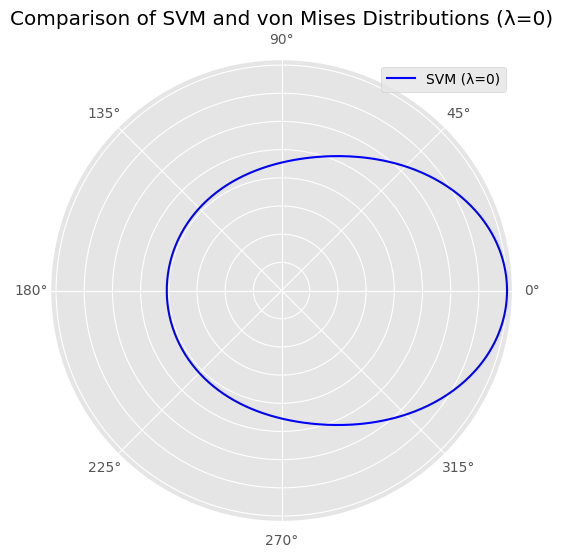

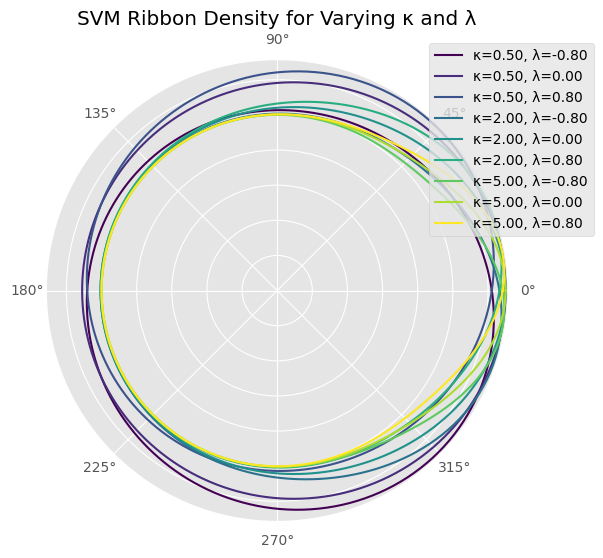

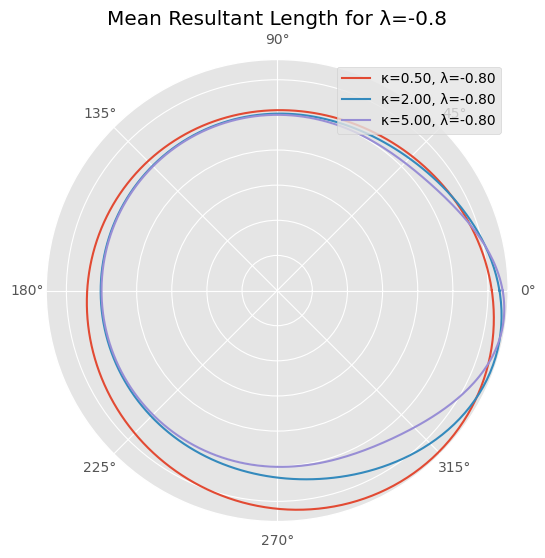

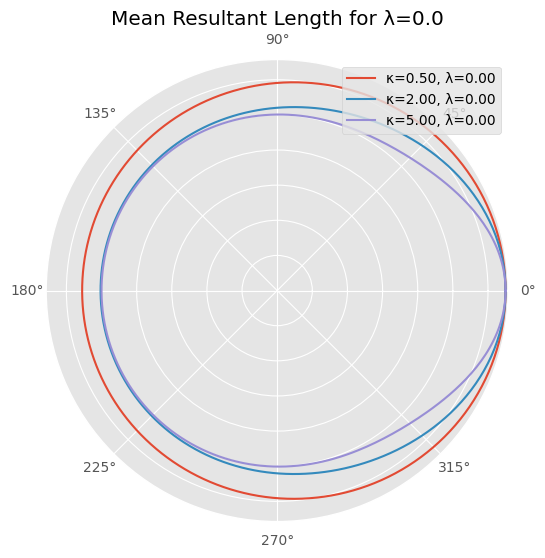

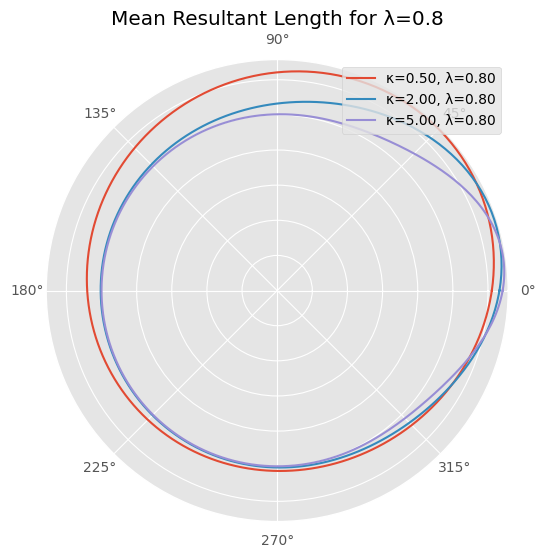

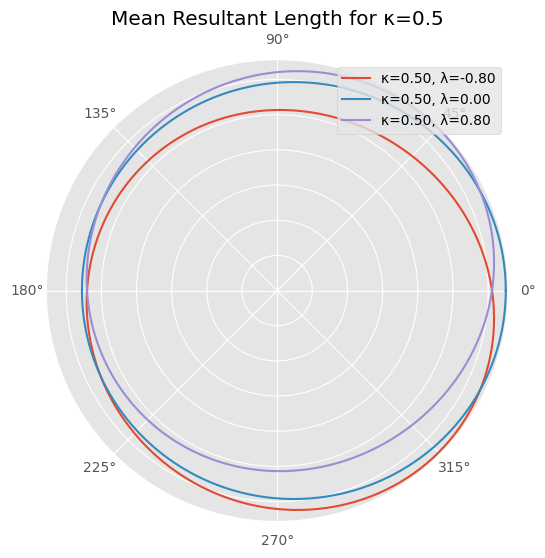

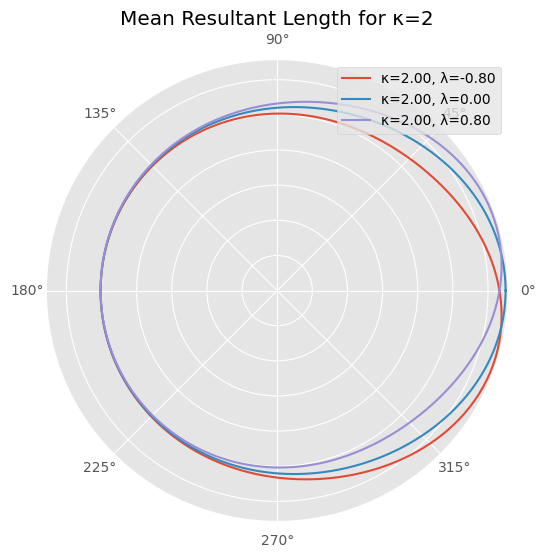

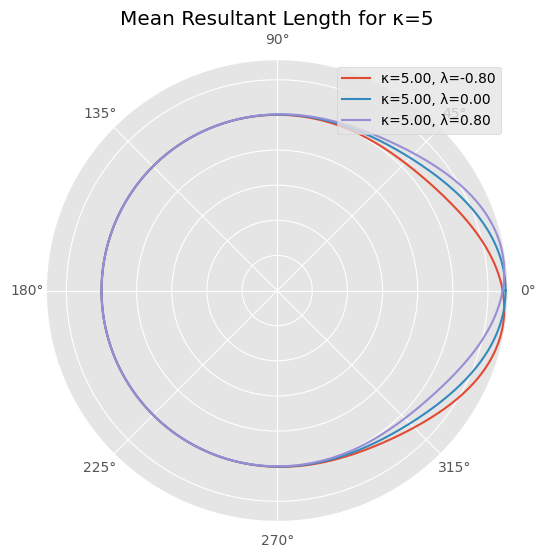

In [ ]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import os

# Create a directory to save plots and tables
output_dir = 'svm_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to compute the SVM probability density function
def svm_pdf(theta, mu, kappa, lam):
    """
    Compute the probability density function of the Skewed von Mises distribution.

    Parameters:
    - theta: array_like, angles in radians.
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter (kappa >= 0).
    - lam: float, skewness parameter (|lam| <= 1).

    Returns:
    - pdf: array_like, probability densities corresponding to theta.
    """
    C = 1 / (2 * np.pi * sp.i0(kappa))
    exponent = kappa * np.cos(theta - mu)
    skew_term = 1 + lam * np.sin(theta - mu)
    pdf = C * np.exp(exponent) * skew_term
    return np.maximum(pdf, 0)  # Ensure non-negativity

# Function to plot the SVM density around the circumference of a circle with ribbon-like visualization
def plot_svm_density_ribbon(mu, kappa_values, lam_values, title='', save_path=None):
    """
    Plot the SVM density function on the circumference of a circle with varying parameters.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa_values: list, concentration parameters.
    - lam_values: list, skewness parameters.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

    # Loop over kappa and lambda values, each density is represented by a ribbon
    colors = plt.cm.viridis(np.linspace(0, 1, len(kappa_values) * len(lam_values)))
    color_index = 0

    for kappa in kappa_values:
        for lam in lam_values:
            pdf_vals = svm_pdf(theta, mu, kappa, lam)
            pdf_normalized = pdf_vals / pdf_vals.max() * 0.3  # Scale ribbon thickness
            ax.plot(theta, pdf_normalized + 1, label=f'κ={kappa:.2f}, λ={lam:.2f}', color=colors[color_index])
            color_index += 1

    ax.set_yticklabels([])  # Hide radial labels
    plt.title(title)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to compare SVM and von Mises distributions
def compare_svm_vm(mu, kappa):
    """
    Compare the SVM and von Mises distributions when λ=0.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    # SVM with λ = 0
    svm_pdf_vals = svm_pdf(theta, mu, kappa, lam=0)

    # Plot comparison of SVM and von Mises
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
    ax.plot(theta, svm_pdf_vals / svm_pdf_vals.max() + 1, label='SVM (λ=0)', color='blue')
    ax.set_yticklabels([])
    plt.title('Comparison of SVM and von Mises Distributions (λ=0)')
    plt.legend(loc='upper right')
    plt.savefig(os.path.join(output_dir, 'svm_vs_vm.png'))
    plt.show()

# Function to plot moments as functions of parameters
def plot_moments(mu, kappa_values, lam_values):
    """
    Plot the first trigonometric moment (mean resultant length) as functions of parameters.

    Parameters:
    - mu: float, fixed mean direction.
    - kappa_values: array_like, range of kappa values.
    - lam_values: array_like, range of lambda values.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    # Plot for varying κ, fixed λ
    for lam in lam_values:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
        for kappa in kappa_values:
            pdf_vals = svm_pdf(theta, mu, kappa, lam)
            pdf_normalized = pdf_vals / pdf_vals.max() * 0.3  # Scale ribbon thickness
            ax.plot(theta, pdf_normalized + 1, label=f'κ={kappa:.2f}, λ={lam:.2f}')
        ax.set_yticklabels([])  # Hide radial labels
        plt.title(f'Mean Resultant Length for λ={lam}')
        plt.legend(loc='upper right')
        plt.savefig(os.path.join(output_dir, f'svm_ribbon_kappa_lambda{lam}.png'))
        plt.show()

    # Plot for varying λ, fixed κ
    for kappa in kappa_values:
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})
        for lam in lam_values:
            pdf_vals = svm_pdf(theta, mu, kappa, lam)
            pdf_normalized = pdf_vals / pdf_vals.max() * 0.3  # Scale ribbon thickness
            ax.plot(theta, pdf_normalized + 1, label=f'κ={kappa:.2f}, λ={lam:.2f}')
        ax.set_yticklabels([])  # Hide radial labels
        plt.title(f'Mean Resultant Length for κ={kappa}')
        plt.legend(loc='upper right')
        plt.savefig(os.path.join(output_dir, f'svm_ribbon_lambda_kappa{kappa}.png'))
        plt.show()

# Main function to run the analysis
def main():
    mu = 0  # Fixed mean direction
    kappa_values = [0.5, 2, 5]  # Varying concentration parameters
    lam_values = [-0.8, 0.0, 0.8]  # Varying skewness parameters

    # Compare SVM with von Mises
    compare_svm_vm(mu, kappa=2)

    # Plot SVM density with ribbon visualization for varying parameters
    plot_svm_density_ribbon(mu, kappa_values, lam_values, title='SVM Ribbon Density for Varying κ and λ',
                            save_path=os.path.join(output_dir, 'svm_ribbon_density_comparison.png'))

    # Plot moments as functions of parameters
    plot_moments(mu, kappa_values, lam_values)

# Execute the main function
if __name__ == "__main__":
    main()


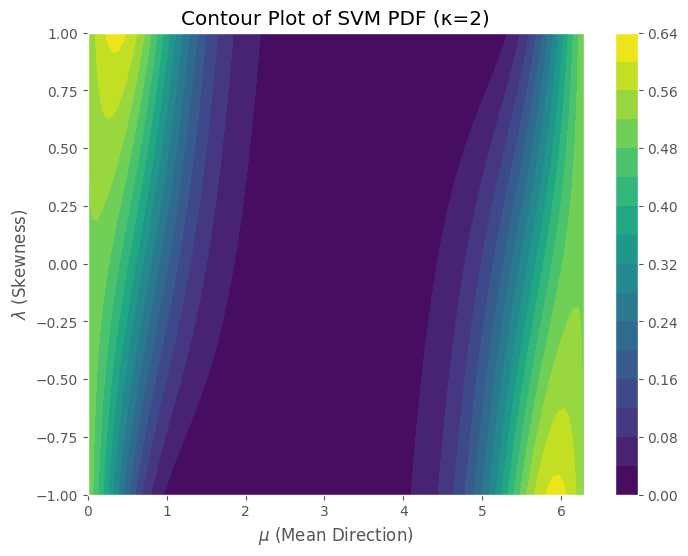

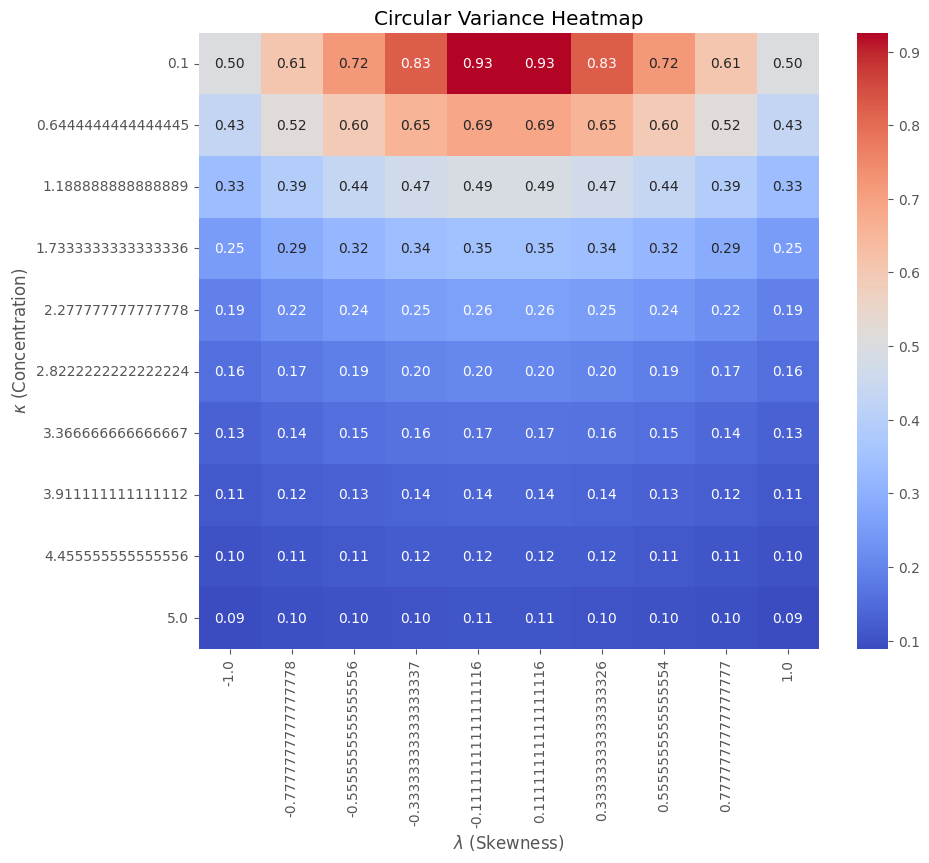

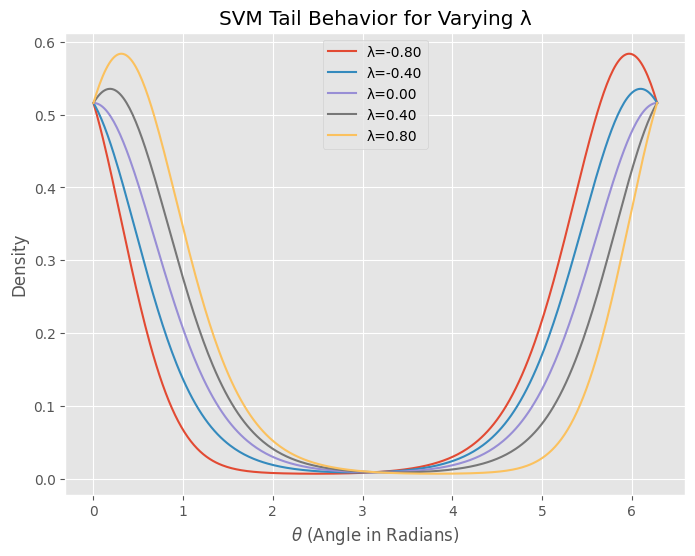

    μ    κ    λ  Circular Variance
0   0  0.5 -0.5           0.657054
1   0  0.5  0.0           0.757500
2   0  0.5  0.5           0.657054
3   0  1.0 -0.5           0.500921
4   0  1.0  0.0           0.553610
5   0  1.0  0.5           0.500921
6   0  2.0 -0.5           0.280750
7   0  2.0  0.0           0.302225
8   0  2.0  0.5           0.280750
9   0  5.0 -0.5           0.102161
10  0  5.0  0.0           0.106617
11  0  5.0  0.5           0.102161


In [ ]:
import seaborn as sns
import pandas as pd

# Improved aesthetics for matplotlib
plt.style.use('ggplot')

# Function to generate a contour plot of the SVM PDF for varying mu and lambda
def contour_svm_pdf(mu_values, lambda_values, kappa_fixed, title='', save_path=None):
    """
    Generate a contour plot of the SVM PDF over varying mu and lambda with fixed kappa.

    Parameters:
    - mu_values: array_like, range of mu values (mean direction).
    - lambda_values: array_like, range of lambda values (skewness).
    - kappa_fixed: float, fixed concentration parameter.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    X, Y = np.meshgrid(mu_values, lambda_values)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = svm_pdf(X[i, j], 0, kappa_fixed, Y[i, j]).max()  # Use max density for contour plot

    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, cmap='viridis', levels=15)
    plt.colorbar(cp)
    plt.title(title)
    plt.xlabel(r'$\mu$ (Mean Direction)')
    plt.ylabel(r'$\lambda$ (Skewness)')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to generate a heatmap of circular variance for varying kappa and lambda
def heatmap_circular_variance(kappa_values, lambda_values, mu_fixed=0, title='', save_path=None):
    """
    Generate a heatmap of the circular variance for varying kappa and lambda.

    Parameters:
    - kappa_values: array_like, range of kappa values (concentration).
    - lambda_values: array_like, range of lambda values (skewness).
    - mu_fixed: float, fixed mean direction (default is 0).
    - title: string, title of the heatmap.
    - save_path: string, path to save the plot.
    """
    variances = np.zeros((len(kappa_values), len(lambda_values)))

    for i, kappa in enumerate(kappa_values):
        for j, lam in enumerate(lambda_values):
            _, _, var_theta = compute_svm_moments(mu_fixed, kappa, lam)
            variances[i, j] = var_theta

    plt.figure(figsize=(10, 8))
    sns.heatmap(variances, xticklabels=lambda_values, yticklabels=kappa_values, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title(title)
    plt.xlabel(r'$\lambda$ (Skewness)')
    plt.ylabel(r'$\kappa$ (Concentration)')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to compare the tail behavior of SVM for different lambda values
def plot_svm_tail_behavior(mu_fixed, kappa_fixed, lambda_values, title='', save_path=None):
    """
    Plot the tail behavior of the SVM distribution for different lambda values.

    Parameters:
    - mu_fixed: float, fixed mean direction.
    - kappa_fixed: float, fixed concentration parameter.
    - lambda_values: array_like, range of lambda values (skewness).
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    plt.figure(figsize=(8, 6))
    for lam in lambda_values:
        pdf_vals = svm_pdf(theta, mu_fixed, kappa_fixed, lam)
        plt.plot(theta, pdf_vals, label=f'λ={lam:.2f}')

    plt.title(title)
    plt.xlabel(r'$\theta$ (Angle in Radians)')
    plt.ylabel('Density')
    plt.legend()
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to generate a table of circular variance for different parameter combinations
def generate_circular_variance_table():
    """
    Generate a table of circular variance for different combinations of kappa and lambda.
    """
    mu_values = [0]
    kappa_values = [0.5, 1, 2, 5]
    lam_values = [-0.5, 0, 0.5]

    data = []
    for mu in mu_values:
        for kappa in kappa_values:
            for lam in lam_values:
                _, _, var_theta = compute_svm_moments(mu, kappa, lam)
                data.append({
                    'μ': mu,
                    'κ': kappa,
                    'λ': lam,
                    'Circular Variance': var_theta
                })

    df = pd.DataFrame(data)
    save_path = os.path.join(output_dir, 'svm_circular_variance_table.csv')
    df.to_csv(save_path, index=False)
    print(df)

# Additional plots and table generation
def extended_analysis():
    # Contour plot of the SVM PDF
    mu_values = np.linspace(0, 2 * np.pi, 100)
    lambda_values = np.linspace(-1, 1, 100)
    contour_svm_pdf(mu_values, lambda_values, kappa_fixed=2, title='Contour Plot of SVM PDF (κ=2)', save_path=os.path.join(output_dir, 'svm_contour_pdf.png'))

    # Heatmap of circular variance
    kappa_values = np.linspace(0.1, 5, 10)
    lambda_values = np.linspace(-1, 1, 10)
    heatmap_circular_variance(kappa_values, lambda_values, title='Circular Variance Heatmap', save_path=os.path.join(output_dir, 'svm_heatmap_variance.png'))

    # Tail behavior of SVM for different lambda values
    lambda_values = [-0.8, -0.4, 0.0, 0.4, 0.8]
    plot_svm_tail_behavior(mu_fixed=0, kappa_fixed=2, lambda_values=lambda_values, title='SVM Tail Behavior for Varying λ', save_path=os.path.join(output_dir, 'svm_tail_behavior.png'))

    # Generate table of circular variance
    generate_circular_variance_table()

# Call the extended analysis function
extended_analysis()


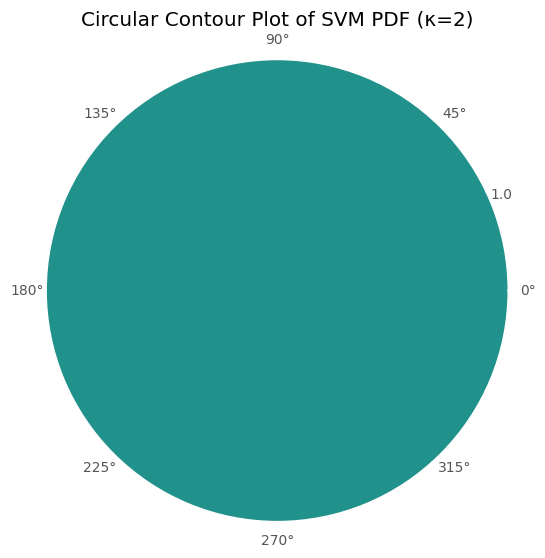

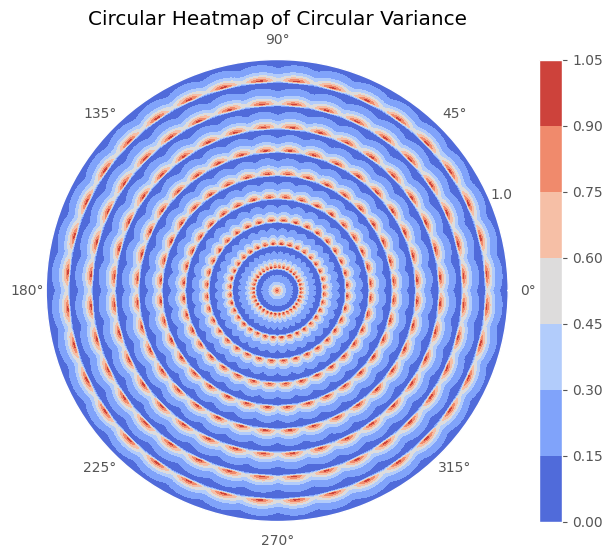

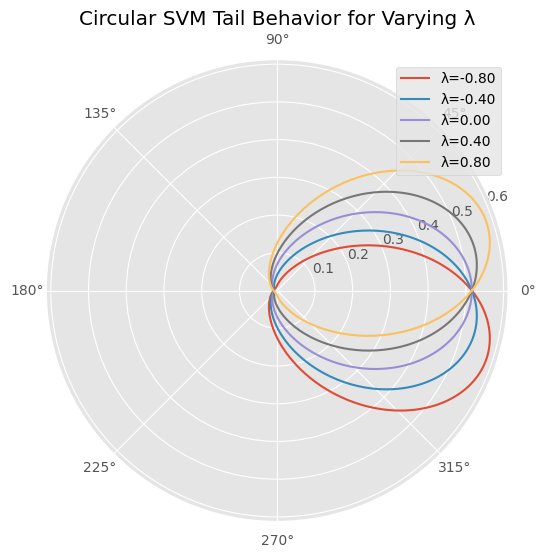

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to generate circular contour-like plots for varying mu and lambda
def circular_contour_svm_pdf(mu_values, lambda_values, kappa_fixed, title='', save_path=None):
    """
    Generate a circular contour-like plot of the SVM PDF for varying mu and lambda.

    Parameters:
    - mu_values: array_like, range of mu values (mean direction).
    - lambda_values: array_like, range of lambda values (skewness).
    - kappa_fixed: float, fixed concentration parameter.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    radius = np.linspace(0, 1, 100)
    T, R = np.meshgrid(theta, radius)
    Z = np.zeros_like(T)

    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            Z[i, j] = svm_pdf(T[i, j], mu_values[j % len(mu_values)], kappa_fixed, lambda_values[i % len(lambda_values)])

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    ax.contourf(T, R, Z, cmap=cm.viridis)
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to generate a circular heatmap of circular variance for varying kappa and lambda
def circular_heatmap_variance(kappa_values, lambda_values, mu_fixed=0, title='', save_path=None):
    """
    Generate a circular heatmap of the circular variance for varying kappa and lambda.

    Parameters:
    - kappa_values: array_like, range of kappa values (concentration).
    - lambda_values: array_like, range of lambda values (skewness).
    - mu_fixed: float, fixed mean direction (default is 0).
    - title: string, title of the heatmap.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)
    radius = np.linspace(0, 1, 100)
    T, R = np.meshgrid(theta, radius)
    Z = np.zeros_like(T)

    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            _, _, var_theta = compute_svm_moments(mu_fixed, kappa_values[i % len(kappa_values)], lambda_values[j % len(lambda_values)])
            Z[i, j] = var_theta

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    c = ax.contourf(T, R, Z, cmap=cm.coolwarm)
    plt.colorbar(c)
    plt.title(title)
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to enhance visual comparison of tail behavior in circular plot
def plot_circular_svm_tail_behavior(mu_fixed, kappa_fixed, lambda_values, title='', save_path=None):
    """
    Plot the circular tail behavior of the SVM distribution for different lambda values.

    Parameters:
    - mu_fixed: float, fixed mean direction.
    - kappa_fixed: float, fixed concentration parameter.
    - lambda_values: array_like, range of lambda values (skewness).
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
    for lam in lambda_values:
        pdf_vals = svm_pdf(theta, mu_fixed, kappa_fixed, lam)
        ax.plot(theta, pdf_vals, label=f'λ={lam:.2f}')

    plt.title(title)
    plt.legend(loc='upper right')
    if save_path:
        plt.savefig(save_path)
    plt.show()

# Extended analysis with circular plots
def extended_circular_analysis():
    # Circular contour plot of the SVM PDF
    mu_values = np.linspace(0, 2 * np.pi, 360)
    lambda_values = np.linspace(-1, 1, 360)
    circular_contour_svm_pdf(mu_values, lambda_values, kappa_fixed=2, title='Circular Contour Plot of SVM PDF (κ=2)', save_path=os.path.join(output_dir, 'svm_circular_contour_pdf.png'))

    # Circular heatmap of circular variance
    kappa_values = np.linspace(0.1, 5, 10)
    lambda_values = np.linspace(-1, 1, 10)
    circular_heatmap_variance(kappa_values, lambda_values, title='Circular Heatmap of Circular Variance', save_path=os.path.join(output_dir, 'svm_circular_heatmap_variance.png'))

    # Circular tail behavior of SVM for different lambda values
    lambda_values = [-0.8, -0.4, 0.0, 0.4, 0.8]
    plot_circular_svm_tail_behavior(mu_fixed=0, kappa_fixed=2, lambda_values=lambda_values, title='Circular SVM Tail Behavior for Varying λ', save_path=os.path.join(output_dir, 'svm_circular_tail_behavior.png'))

# Call the extended circular analysis function
extended_circular_analysis()


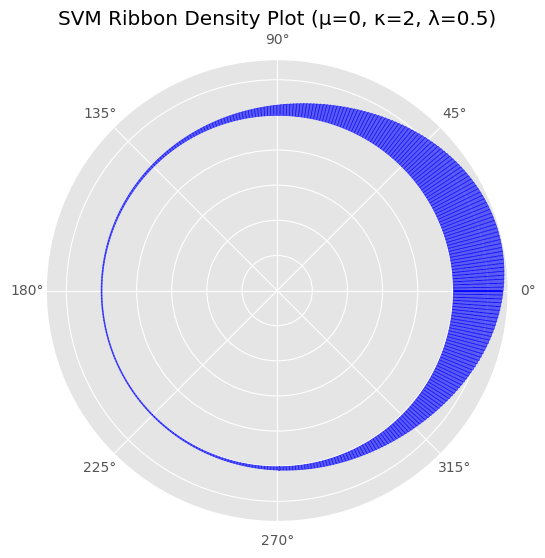

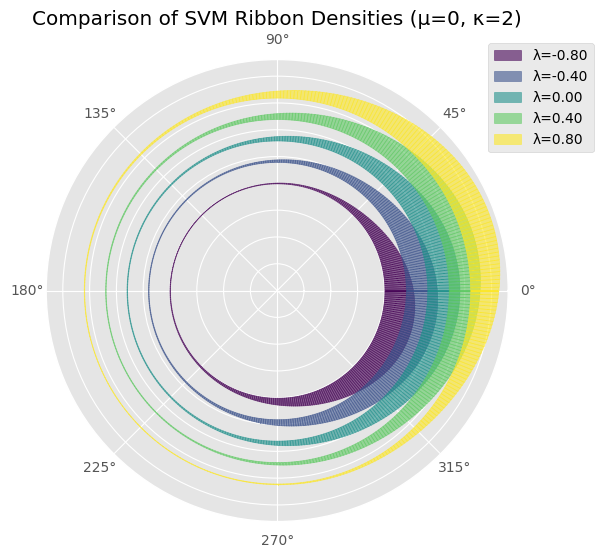

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Wedge

# Function to plot ribbon-like density of SVM distribution around a circle
def plot_svm_ribbon_density(mu, kappa, lam, title='', save_path=None):
    """
    Plot ribbon-like density around a circle for the Skewed von Mises distribution.

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lam: float, skewness parameter.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    # Define the angles (theta)
    theta = np.linspace(0, 2 * np.pi, 360)

    # Compute the PDF values
    pdf_vals = svm_pdf(theta, mu, kappa, lam)

    # Normalize the PDF values for thickness scaling
    pdf_normalized = pdf_vals / pdf_vals.max() * 0.3  # Scale to a max thickness of 0.3

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

    # Draw the ribbon-like density
    for i in range(len(theta) - 1):
        ax.fill_between([theta[i], theta[i+1]], 1, 1 + pdf_normalized[i], color='blue', alpha=0.6)

    ax.set_yticklabels([])  # Hide radial labels
    ax.set_title(title)

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Function to plot multiple ribbon-like densities for comparison
def plot_svm_ribbon_density_comparison(mu, kappa, lambda_values, title='', save_path=None):
    """
    Plot ribbon-like density around a circle for multiple Skewed von Mises distributions with varying skewness (lambda).

    Parameters:
    - mu: float, mean direction in radians.
    - kappa: float, concentration parameter.
    - lambda_values: list of floats, skewness parameters to compare.
    - title: string, title of the plot.
    - save_path: string, path to save the plot.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'polar'})

    # Loop through the lambda values and plot each as a ribbon
    colors = plt.cm.viridis(np.linspace(0, 1, len(lambda_values)))
    for lam, color in zip(lambda_values, colors):
        pdf_vals = svm_pdf(theta, mu, kappa, lam)
        pdf_normalized = pdf_vals / pdf_vals.max() * 0.3  # Scale to max thickness 0.3

        for i in range(len(theta) - 1):
            ax.fill_between([theta[i], theta[i+1]], 1 + 0.2 * lambda_values.index(lam), 1 + pdf_normalized[i] + 0.2 * lambda_values.index(lam),
                            color=color, alpha=0.6, label=f'λ={lam:.2f}' if i == 0 else "")

    ax.set_yticklabels([])  # Hide radial labels
    ax.set_title(title)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.05))

    if save_path:
        plt.savefig(save_path)
    plt.show()

# Call the functions with example parameters
def run_ribbon_density_plots():
    # Single ribbon plot for a fixed set of parameters
    plot_svm_ribbon_density(mu=0, kappa=2, lam=0.5, title='SVM Ribbon Density Plot (μ=0, κ=2, λ=0.5)',
                            save_path=os.path.join(output_dir, 'svm_ribbon_density.png'))

    # Comparison of multiple ribbon densities with different skewness parameters
    lambda_values = [-0.8, -0.4, 0.0, 0.4, 0.8]
    plot_svm_ribbon_density_comparison(mu=0, kappa=2, lambda_values=lambda_values,
                                       title='Comparison of SVM Ribbon Densities (μ=0, κ=2)',
                                       save_path=os.path.join(output_dir, 'svm_ribbon_density_comparison.png'))

# Call the ribbon density plot function
run_ribbon_density_plots()
